## Data Scientist - Capstone - Stock Analysis

### Installed libraries required

pandas, numpy, matplotlib, seaborn, datetime, pandas_datareader,
tensorflow

In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline
from IPython.display import display
from multi_plot import multi_plot

# nasdaq listed companies
# resource https://datahub.io/core/nasdaq-listings#resource-nasdaq-listings_zip


In [308]:
## pip install for pandas-datareader
### pip install git+https://github.com/pydata/pandas-datareader.git
# For reading stock data from yahoo
from pandas_datareader.data import DataReader

In [309]:
# read and zip Ticker Symbol and company name into a dictionay
# And add in select company from NYSE
short_list=['AAPL','GOOG', 'T', 'VZ', 'F', 'GM']
# Read in Nasdaq companies
df=pd.read_csv('data/nasdaq-listed_csv.csv',usecols=['Symbol','Company Name'])
# No ready database from NYSE to added "manually"
nyse_df=pd.DataFrame({'Symbol':['T','VZ','F','GM'],
                                'Company Name':['AT&T Inc.',
                                                'Verizon Communications Inc.',
                                                'Ford Motor Company',
                                                'General Motors Company']})
df=pd.concat([df[df['Symbol'].isin(short_list)],nyse_df])
#create dictionary of company name and symbol
tck_dict=dict(zip(df['Symbol'],df['Company Name']))


In [310]:
#put limits limits on stocks and date
#lets look at the selected companies
# I chose two company from 3 different sectors
print('List of stocks under review')
display(df)
print()
# Use todays date as end and today's date - Year for start
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

List of stocks under review


,Symbol,Company Name
5,AAPL,Apple Inc.
1181,GOOG,Google Inc.
0,T,AT&T Inc.
1,VZ,Verizon Communications Inc.
2,F,Ford Motor Company
3,GM,General Motors Company


In [311]:
def multi_plot(df,ylabel,xlabel,hspace,wspace):
    '''
    purpose: will takin pandas dataframe and plot the columns using the index as the x axis
             and the column values as the y axis
    input:   - a data frame with numeric values in columns
             - cmap: dictionary used for small number of graphs
    output:  a dictionary of the containing the column name and a tuple of graph position
                 in a graph matrix (e.g. (0,0) or (1,3))
    '''
    import pandas as pd
    #%matplotlib inline
    import matplotlib.pylab as plt
    from IPython.display import display
    import matplotlib.dates as mdates
################################################################################    
    def map_it(col_list,nrows,ncols):
        '''
        purpose: This function will accept a list of column names and calculate the positioning
                 of each graph in a 2 wide or 3 wide (predetermined) layout
        input:   - a list of column names
                 - cmap: dictionary used for small number of graphs
        output:  a dictionary of the containing the column name and a tuple of graph position
                     in a graph matrix (e.g. (0,0) or (1,3))
        ''' 
        graph_loc={}
        row=0; col=0
        ncols=ncols-1;nrows=nrows-1
        for name in col_list:
            graph_loc[name]=(row,col)
            if col <= ncols-1:
                col=col+1
            else:
                if row < nrows:
                    row=row+1
                    col=0
        return graph_loc 
  ########################################################################  
    def nrow_ncols(col_list, small = {1:[1,1],2:[1,2],3:[2,2],4:[2,2]}):
        '''
        purpose: This function will accept a list of column names and calculate the number
                 of rows and columns needed for a graph matrix. Below 4 graphs it will use a
                 mix of 3 and 4 graphs wide. Over four columns it will us 3 graphs wide.
        input:   - col_list: list of columns to be graphed
                 - cmap: dictionary used for small number of graphs             - 
        output:  the number of rows and the number of columns needed for graphing. 
        call:    nrows,ncols=nrow_ncols(col_list)
        ''' 
        import math   
        len_cols=len(col_list)

        if len_cols in small.keys():
            ncols=small[len_cols][0]
            nrows=small[len_cols][1]
        else:
            nrows=math.ceil(len_cols/3)
            ncols=3
        return(nrows,ncols)
    ############################################################################
    ################ main plot routine #########################################
    
    col_list=list(df.columns)
    nrows,ncols=nrow_ncols(col_list)
    graph_loc=map_it(col_list,nrows,ncols)

    height=nrows*3.5
    fig,axes = plt.subplots(nrows=nrows, ncols=ncols, figsize= (15,height))
    
    

    fig.subplots_adjust(hspace=hspace)
    fig.subplots_adjust(wspace=wspace)

    for col in col_list:
        # The single row has to handled separately. Matplotlib does not care for [0,n]
        # arrays. it throws an error unless handled as a [n] array
        if nrows==1:
            df[col].plot(ax=axes[graph_loc[col][1]]);
            axes[graph_loc[col][1]].grid()
            axes[graph_loc[col][1]].set_title(col,fontsize=15);
            axes[graph_loc[col][1]].set_xlabel(xlabel,fontsize=20, color='b')
            axes[graph_loc[col][1]].set_ylabel(ylabel,fontsize=20)
            axes[graph_loc[col][1]].fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
        else:
            df[col].plot(ax=axes[graph_loc[col][0],graph_loc[col][1]]);
            axes[graph_loc[col][0],graph_loc[col][1]].grid()
            axes[graph_loc[col][0],graph_loc[col][1]].set_title(col,fontsize=15);
            axes[graph_loc[col][0],graph_loc[col][1]].set_xlabel(xlabel,fontsize=20, color='r');
            for tick in axes[graph_loc[col][0],graph_loc[col][1]].get_xticklabels():
                tick.set_rotation(45)
                
            axes[graph_loc[col][0],graph_loc[col][1]].set_ylabel(ylabel,fontsize=20);
            axes[graph_loc[col][0],graph_loc[col][1]].fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
            
    plt.show()
    return

In [312]:
#Read selected stock into dataframe
for indx,stock in enumerate(short_list):
    if indx==0:
        try:
            df=DataReader(stock, 'yahoo', start, end)
            df['tckr']=stock
        except KeyError:
            pass
    else:
        try:
            tmp_df=DataReader(stock, 'yahoo', start, end)
        except KeyError:
            pass
        tmp_df['tckr']=stock
        df=pd.concat([df,tmp_df],axis=0)
       

In [313]:
#explore dataset

df = df.dropna(subset=['tckr'])
print ('Shape of DataFrame:')
print (df.shape)
print()

# show tckrs and companies
df['company']=df['tckr'].map(tck_dict)
print('Companies under Review')
tmp_df=df.groupby(['tckr','company']).count()  
display(tmp_df[tmp_df.columns[:-6]])
df=df.drop(columns='company')

#Number of Nans
print()
print ("display number of NaN in columns")
display(df.isnull().sum(axis = 0))
print()

#Head and Tail of Database
print('Head and Tail of Database')
display(pd.concat([df.head(),df.tail()]))

Shape of DataFrame:
(1518, 7)

Companies under Review


,
tckr,company
AAPL,Apple Inc.
F,Ford Motor Company
GM,General Motors Company
GOOG,Google Inc.
T,AT&T Inc.
VZ,Verizon Communications Inc.



display number of NaN in columns


High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
tckr         0
dtype: int64


Head and Tail of Database


,High,Low,Open,Close,Volume,Adj Close,tckr
Date,,,,,,,
2019-11-07,65.087502,64.527496,64.684998,64.857498,94940400.0,64.302185,AAPL
2019-11-08,65.110001,64.212502,64.672501,65.035004,69986400.0,64.478165,AAPL
2019-11-11,65.617500,64.570000,64.574997,65.550003,81821200.0,64.988770,AAPL
2019-11-12,65.697502,65.230003,65.387497,65.489998,87388800.0,64.929268,AAPL
2019-11-13,66.195000,65.267502,65.282501,66.117500,102734400.0,65.551399,AAPL
2020-11-02,35.380001,34.380001,35.119999,34.549999,14648400.0,34.549999,GM
2020-11-03,35.990002,34.889999,35.099998,35.349998,11439100.0,35.349998,GM
2020-11-04,35.770000,34.230000,35.310001,35.240002,14740600.0,35.240002,GM
2020-11-05,37.250000,35.340000,36.900002,37.139999,35075000.0,37.139999,GM


In [314]:
#summary Stats for one company
print("stats for ",short_list[1])
df[df['tckr']==short_list[1]].describe()


stats for  GOOG


,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,1433.350207,1398.863057,1415.145360,1416.930531,1.858908e+06,1416.930531
std,134.820769,136.395283,135.533433,134.951575,7.769099e+05,134.951575
min,1071.319946,1013.536011,1056.510010,1056.619995,3.475000e+05,1056.619995
25%,1351.199951,1323.910034,1335.020020,1339.329956,1.378300e+06,1339.329956
50%,1443.708984,1418.829956,1432.630005,1433.900024,1.651500e+06,1433.900024
75%,1520.739990,1489.449951,1506.150024,1511.339966,2.060600e+06,1511.339966
max,1793.640015,1750.510010,1781.000000,1763.369995,4.329100e+06,1763.369995


## Stock Analysis at First Glance

### What are the Stock Trends

##### Daily Close Data 


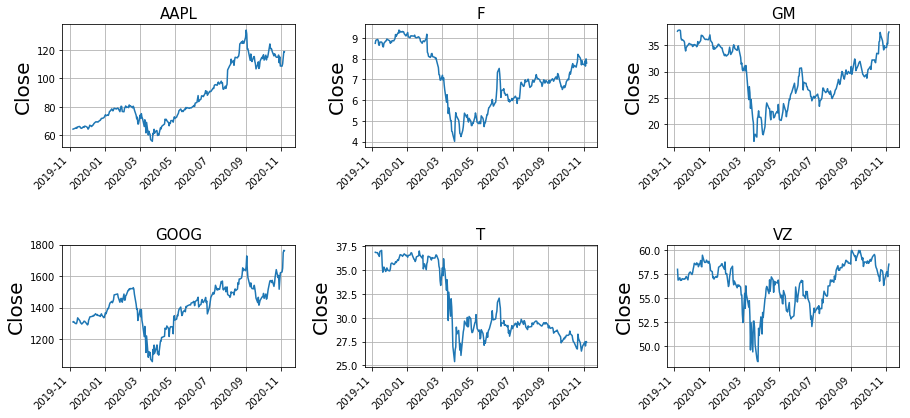

In [315]:
#multi-plot view of close data
#from multi_plot import multi_plot
tmp_df=df[['tckr','Adj Close']].reset_index().pivot(index='Date',columns='tckr',
                                                values='Adj Close').reset_index().set_index('Date')
multi_plot(tmp_df,"Close","", .8,.3)

##### Daily Volumes

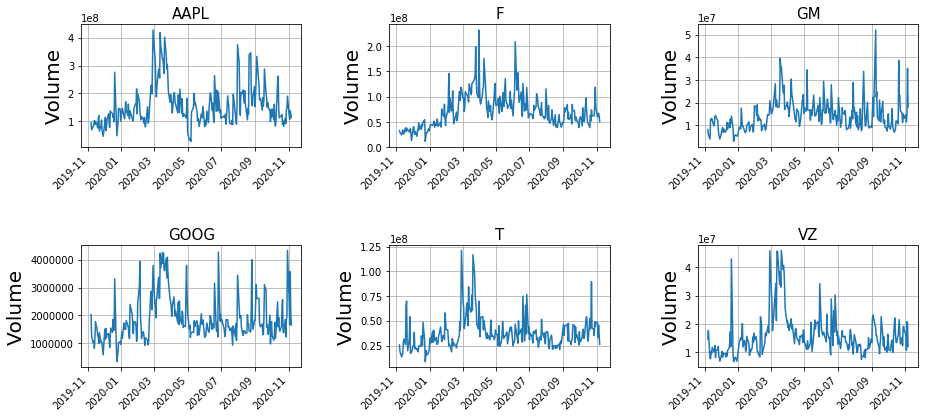

In [316]:
#multi-plot view of Volume data
tmp_df=df[['tckr','Volume']].reset_index().pivot(index='Date',columns='tckr',
                                                    values='Volume').reset_index().set_index('Date')
multi_plot(tmp_df,"Volume","", .8,.4)


#### Moving Average for Trend Analysis

A moving average (MA) is a widely used technical indicator that smooths out price trends by filtering out the “noise” from random short-term price fluctuations. ... The most common applications of moving averages are to identify trend direction and to determine support and resistance levels. 

Ref#1 How to Use a Moving Average to Buy Stocks by Cory Mitchell
(https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp)

Ref#2 Python Pandas || Moving Averages and Rolling Window Statistics for Stock Prices
Mat McCarty (https://www.youtube.com/watch?v=T2mQiesnx8s)

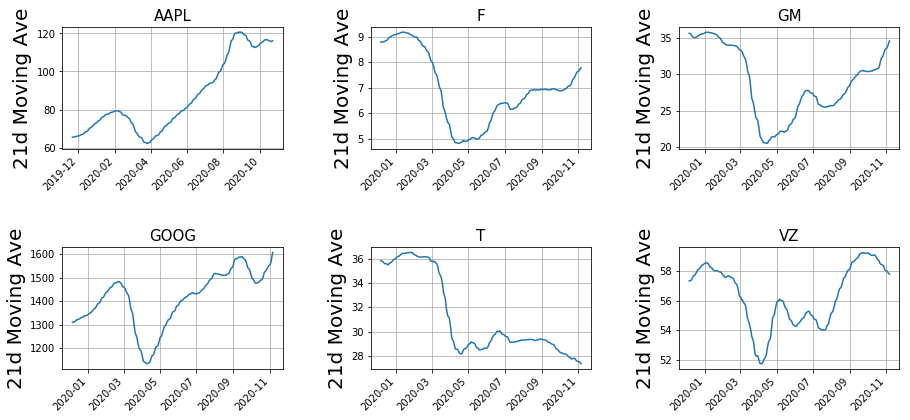

In [317]:
tmp_df=df[['tckr','Adj Close']].reset_index().pivot(index='Date',columns='tckr',
                                               values='Adj Close').reset_index().set_index('Date')
for indx,company in enumerate(tmp_df.columns):
    if indx==0:
        tmp_df2=tmp_df.iloc[:,indx].reset_index().set_index('Date').rolling(21,center=True).mean()
    else:
        tmp_df2=tmp_df2.merge(tmp_df.iloc[:,indx].reset_index().set_index('Date').rolling(21).mean(),on='Date')
multi_plot(tmp_df2,"21d Moving Ave","",.8,.4)  

### How Volatile is the Stock?
#### Measure Daily returns as a percentage

The daily return measures the dollar change in a stock’s price as a percentage of the previous day’s closing price. A positive return means the stock has grown in value, while a negative return means it has lost value. A stock with lower positive and negative daily returns is typically less risky than a stock with higher daily returns, which create larger swings in value. 
ref: https://pocketsense.com/calculate-daily-stock-return-5138.html

#### Daily Percent Change shown as histograms
ref: Calculating Simple Statistics with Python and Pandas: Stock Market Data
 by Kevin Mooney (https://www.youtube.com/watch?v=oWQfgFZ1oHw)

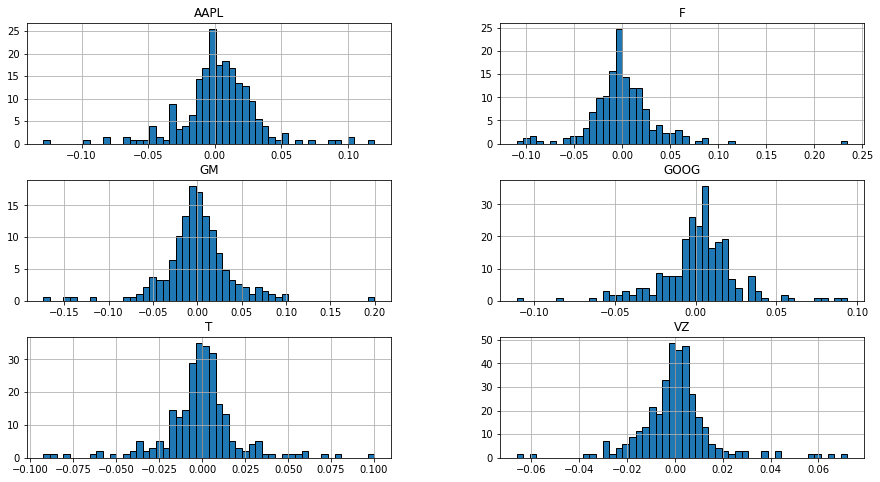

In [318]:

df['pct']=df.groupby('tckr')['Adj Close'].pct_change()
tmp_df=df[['tckr','pct']].reset_index().pivot(index='Date',columns='tckr',
                                                    values='pct').reset_index().set_index('Date')
tmp_df.hist(figsize=(15,8),bins=50, edgecolor='black',
           density=True);

#### Kurtosis
kurtosis is a measure that describes the shape of a distribution's tails in relation to its overall shape. A distribution can be infinitely peaked with low kurtosis, and a distribution can be perfectly flat-topped with infinite kurtosis. Thus, kurtosis measures "tailedness," not "peakedness." This means for our stock analysis that the higher the  number the more likely there will be outliers (volitility in the stock).

In [319]:
#kerosis numbers
kur_d={}
tmp2_df=tmp_df.unstack().reset_index().set_index('Date') \
            .rename(columns={0:'pct'})         
for company in short_list:
    kur_d[company]=tmp2_df[tmp2_df['tckr']==company]['pct'].kurtosis()

pd.DataFrame(kur_d,index=list(kur_d.keys())).reset_index().drop(columns='index').head(1)
    


,AAPL,GOOG,T,VZ,F,GM
0,4.094576,3.920209,4.969945,5.990716,8.841751,5.766001


### How Closely Corrolated are our plots?
#### Pairwise plots can show at a glance. When two stocks are closely corrolated we can see them group closer to the line.

Although all these stock show high correlation with one another (they are all tech stocks) we can see a higher correlation between Google and Facebook and a lower correlation between Apple and Tesla. 

C:\Users\Jim.000\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


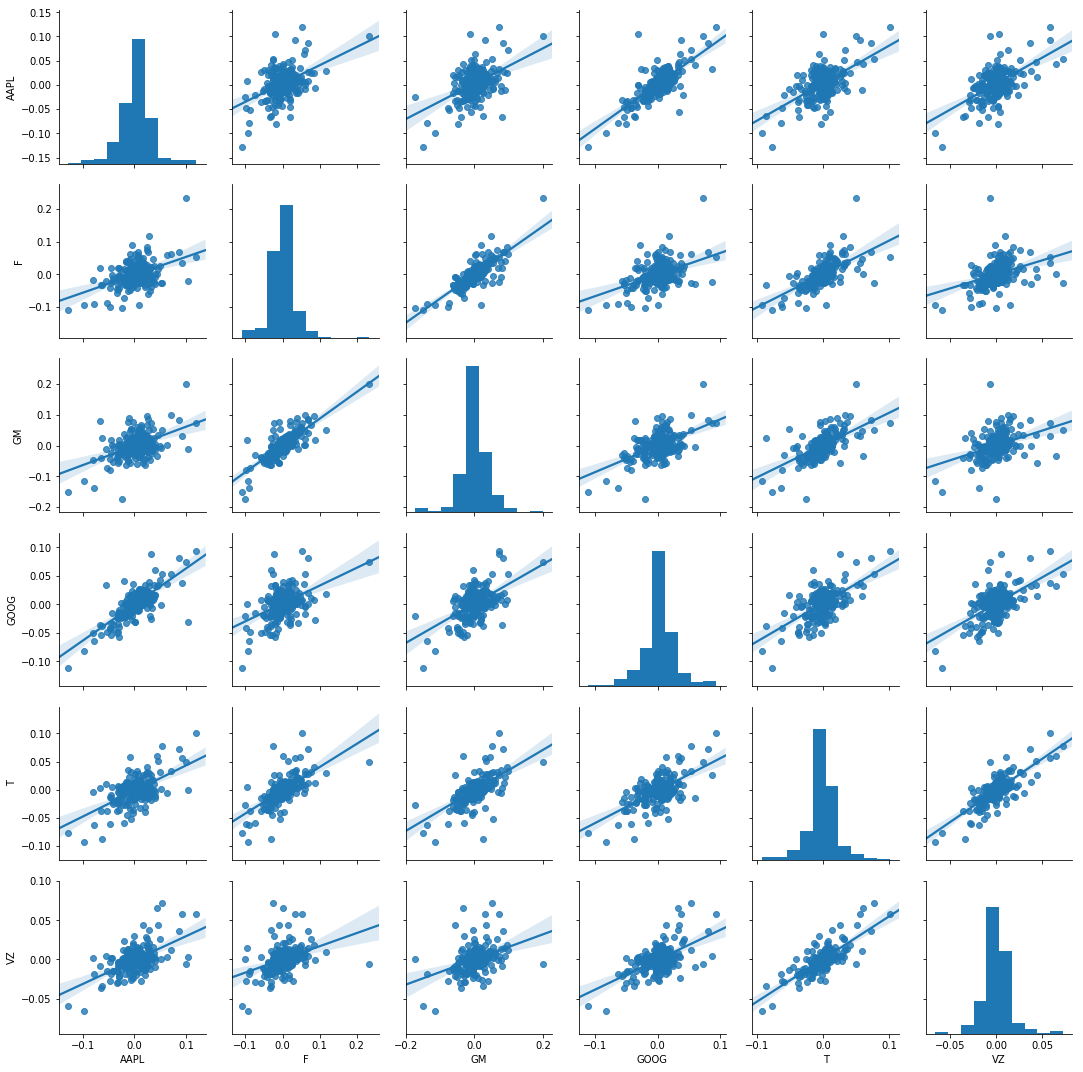

In [320]:
# Pairwise plots to visualize coorelations
cls_pct_change_df=df[['pct','tckr']].reset_index().dropna()
cls_pct_change_df=cls_pct_change_df.pivot_table(index='Date', columns='tckr', values='pct').dropna()
sns.pairplot(cls_pct_change_df,kind='reg');

#### Heat maps are another Good Way to see Correlation
Here we see correlation values between each pair. We can see our earlier observations were borne out.  The correlation between Google and FaceBook is .81, while the correlation between Apple and Tesla is.5.

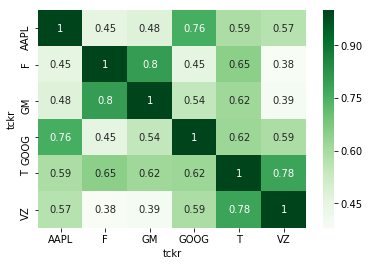

In [321]:
#closing percentage change as a heatmap
cls_pct_change_df
sns.heatmap(cls_pct_change_df.corr(), annot=True,cmap="Greens");

### Predicting the stock price with Stacked LSTM

In [322]:
# 1. Get a stock Quote
pred_stock_df=DataReader(short_list[0], data_source='yahoo')
print(short_list[0])
display(pd.concat([pred_stock_df.head(3),pred_stock_df.tail(2)]))


AAPL


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-09,30.452499,30.012501,30.240000,30.142500,135485600.0,27.926165
2015-11-10,29.517500,29.014999,29.225000,29.192499,236511600.0,27.046017
2015-11-11,29.355000,28.802500,29.092501,29.027500,180872000.0,26.893150
2020-11-05,119.620003,116.870003,117.949997,119.029999,126387100.0,118.824997
2020-11-06,119.199997,116.129997,118.320000,118.690002,114283600.0,118.690002


**Don't you wish you bought some Apple stock in 2015?**

Let's take a look at its performance on a graph

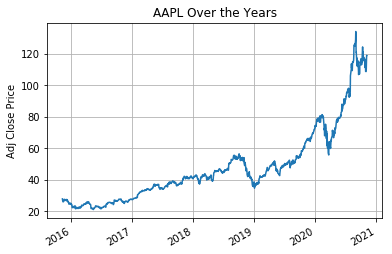

In [323]:
pred_stock_df['Adj Close'].plot(grid=True,title=short_list[0] +' Over the Years');
plt.xlabel('')
plt.ylabel('Adj Close Price')
plt.show();

**See you really wanted to buy in early 2019**

### Predicting a Stock Price

Lets pick one of the communication stocks to work with

A quick re-look at closing performance


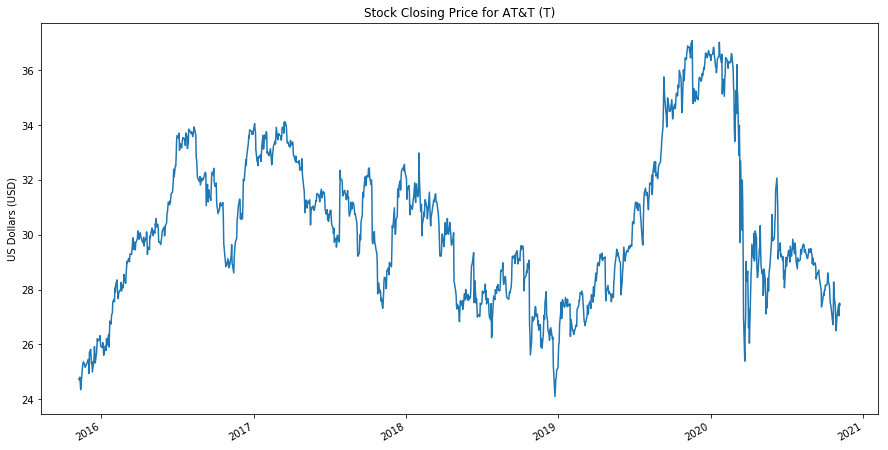

In [324]:
df = DataReader('T', data_source='yahoo')
       
df['Adj Close'].plot(figsize=(15,8),
                    title='Stock Closing Price for AT&T (T)')
plt.ylabel('US Dollars (USD)');
plt.xlabel('');
print('A quick re-look at closing performance')

#### Why Scale
"The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting."

ref:https://towardsdatascience.com/everything-you-need-to-know-about-min-max-normalization-in-python-b79592732b79


In [325]:
df1=df.reset_index()['Adj Close']
#In order to model this informationwe first need to scale it.

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))


### Split the data into Training and Test

In [326]:

#For time series data we will divide the data for test and train by date.
#We will use a 70/30 split
training_size=int(len(df1)*.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
display(pd.DataFrame({'train_data len:':[len(train_data)],
                     'test_data len:':len(test_data)}))


,train_data len:,test_data len:
0,881,378


#### Creating the Data using Timesteps

In [327]:
#create a dataset
#ref: Stock Price Prediction And Forecasting Using Stacked LSTM- Deep Learning
# https://www.youtube.com/watch?v=H6du_pfuznE  
'''
purpose: This routine will read in the data set and separate the data
         into a series of x values and y values. The Y values will be
         every nth value in the series where n is the time_step. So for
         instance if the time_step is three the first three values are
         given to the x series and the fourth value is assigned to the
         y series. Then process repeats so the values from position 2-4
         are x and the the 4 value is assiged to y.
input:   - the data set (numpy array) and the timestep
output:  The X and Y series as Numpy arrays
'''

def create_dataset(dataset, time_step=1):
    dataX,dataY=[],[]
    for indx in range(len(dataset)-time_step-1):
        a=dataset[indx:(indx+time_step),0]
        dataX.append(a)
        dataY.append(dataset[indx+time_step,0])
    return np.array(dataX),np.array(dataY)



In [328]:
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test =create_dataset(test_data,time_step)
display(pd.DataFrame({'X_train shape':[X_train.shape],
                     'y_train shape':[y_train.shape],
                     'X_test shape':[X_test.shape],
                     'y_test shape':[y_test.shape]}))

,X_train shape,y_train shape,X_test shape,y_test shape
0,"(780, 100)","(780,)","(277, 100)","(277,)"


#### Reshape data for LSTM

In [329]:
# for LSTM model we have to reshape the data 
#  to be [samples,time steps,features]

X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

#### Create the LSTM model
ref "Using a Keras Long Short-Term Memory (LSTM) Model to Predict Stock Prices" by Derrick Mwiti
https://heartbeat.fritz.ai/using-a-keras-long-shortterm-memory-lstm-model-to-predict-stock-prices-a08c9f69aa74

- **Sequential** for initializing the neural network
- **Dense**      for adding a densely connected neural network layer
- **LSTM**       for adding the Long Short-Term Memory layer
- **Dropout**    for adding dropout layers that prevent overfitting
    - When defining the Dropout layers, we specify 0.2, meaning that 20% of the layers will be dropped.

In [330]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [331]:
# Now we set up the LSTM stacked layers
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
#model.compile(loss='mean_squared_error',optimizer='adam')
model.compile(loss='mean_squared_error',
              optimizer='adam')
            
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
dropout_12 (Dropout)         (None, 100, 50)           0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
dropout_13 (Dropout)         (None, 100, 50)           0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_14 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total para

#### Fit the model
- Using 100 Epochs
    - "Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation."
    - https://stackoverflow.com/questions/44907377/what-is-epoch-in-keras-models-model-fit
- Plotting the loss vs Epochs to see improvement

2020-11-07 21:59:27 Takes about 10 min


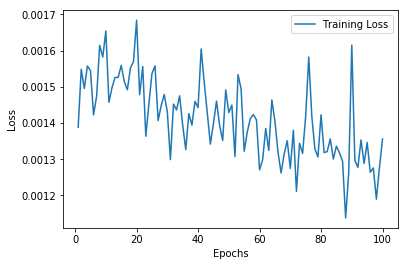

Wall time: 15min 40s


In [344]:
%%time
from time import gmtime, strftime
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()),
      "Takes 10-15 min (with no gpu)")
## Fit and assign to history
# now we fit the model. This has been taking about 10-15 minutes
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,
         batch_size=64,verbose=0)

## Plot history
# ref: https://stackoverflow.com/questions/52614922/
#how-to-plot-training-loss-and-accuracy-curves-for-a-mlp-model-in-keras
loss_values = history.history['loss']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



#### Prediction and  Performace Metrics

In [334]:
#Pull the prediction info from the model
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

#transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [335]:
#Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
RSME_train=math.sqrt(mean_squared_error(y_train,train_predict))
RSME_Test=math.sqrt(mean_squared_error(y_test,test_predict))
display(pd.DataFrame({'RSME Train':[RSME_train],
                     'RSME Test': [RSME_Test]}))

,RSME Train,RSME Test
0,29.868082,31.412631


#### Plot Train and Test Predictions

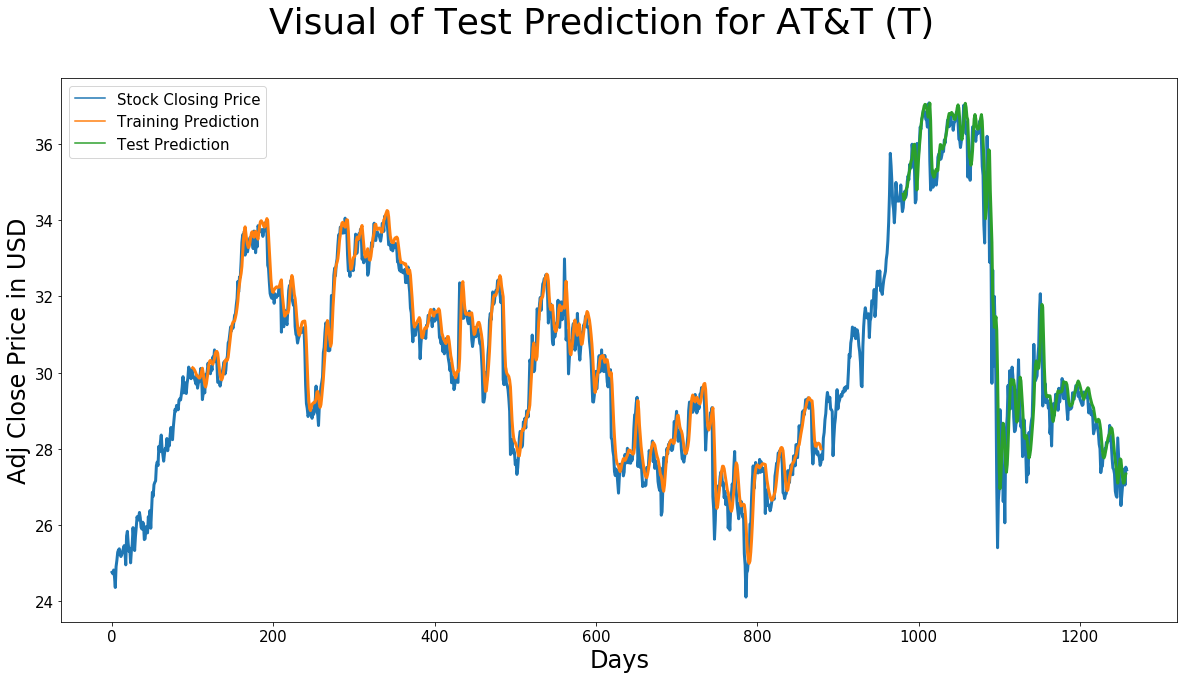

In [336]:
### Plotting
#shift train predictions for plotting
look_back=100
trainPredictPlot=np.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict
#shift test predictions for plotting
testPredictPlot=np.empty_like(df1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict
#plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(df1),label='Stock Closing Price')
plt.plot(trainPredictPlot,label='Training Prediction')
plt.plot(testPredictPlot,label="Test Prediction")
plt.suptitle("Visual of Test Prediction for AT&T (T)", fontsize=36) 
plt.xlabel('Days', fontsize=24)
plt.ylabel('Adj Close Price in USD', fontsize=24)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(loc=2, prop={'size': 15})
for line in plt.gca().lines:
    line.set_linewidth(3.)
plt.show()

#### Reshape Data for Prediction

In [337]:
x_input=test_data
#we need previous 100 days for prediction
prev_100=len(test_data)-100
x_input=test_data[prev_100:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
#x_input.shape


(1, 100)

#### 30 Day Prediction for AT&T Stock
- ref: Stock Price Prediction And Forecasting Using Stacked LSTM- Deep Learning
- https://www.youtube.com/watch?v=H6du_pfuznE  

In [338]:
#demonstrate prediction for next 30 days
# create the Y values for the prediction plot

num_of_days_out=30

from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<num_of_days_out):
    if len(temp_input)>100:
        x_input=np.array(temp_input[1:]) 
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1


In [339]:
#establish x (day values for prediction plot)
days_new=np.arange(1,101)
days_pred=np.arange(101,131)

In [340]:
#df3=df1.tolist()
#df3.extend(lst_output)

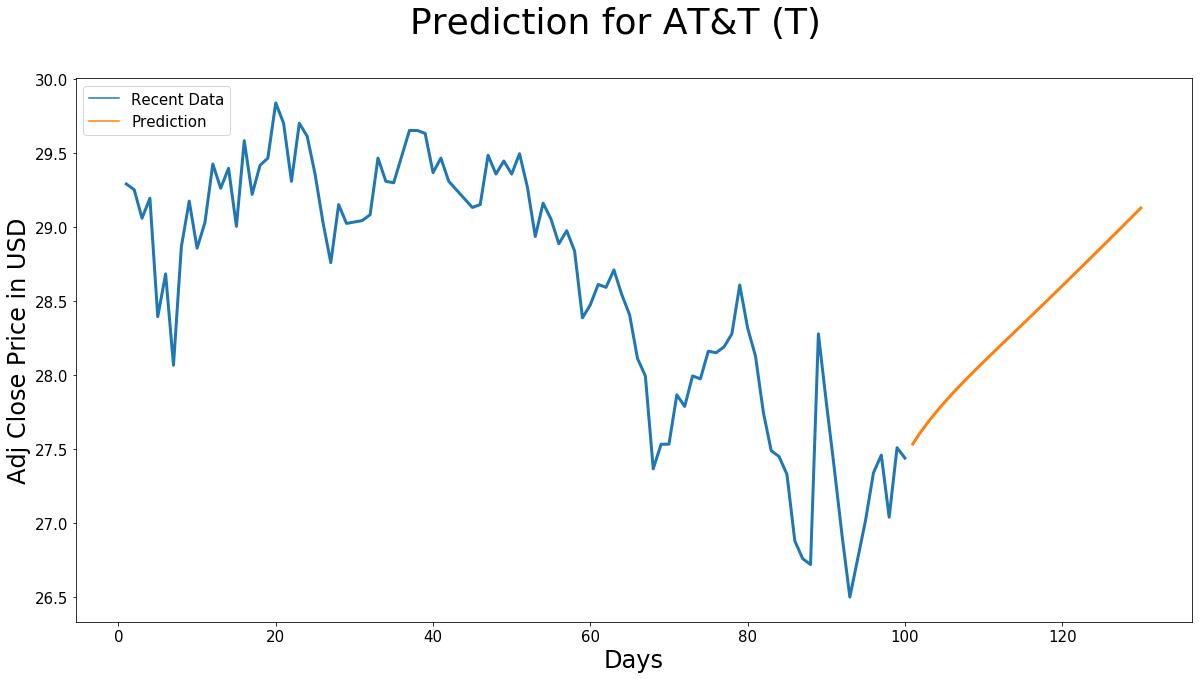

In [341]:
plt.figure(figsize=(20,10))
plt.xlabel('Days', fontsize=24)
plt.ylabel('Adj Close Price in USD', fontsize=24)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.suptitle("Prediction for AT&T (T)", fontsize=36)

plt.plot(days_new,scaler.inverse_transform(df1[1159:]),label="Recent Data")
plt.plot(days_pred,scaler.inverse_transform(lst_output),label="Prediction")
plt.legend(loc=2, prop={'size': 15})
for line in plt.gca().lines:
    line.set_linewidth(3.)
plt.show()

